File name:  VLowRes.ipynb  
Author: Andrew Henrici  
Date Created:  2/17/2018  
Date last modified: 2/6/2018  
Description:  Find and plot the distance 
and relative velocities between galaxies 
throughout the merger

In [1]:
%matplotlib notebook
import numpy as np
import astropy.units as u
from ReadFile import read
from CenterOfMass import CenterOfMass
import matplotlib.pyplot as plt

In [2]:
# Function to create find and store all of the 
# COM pos and COM vel for given galaxy in given 
# time span with given time steps(n)
def OrbitCOM(galaxy, start, end, n):
    fileout = "Orbit_{}.txt".format(galaxy)

    Orbit = np.zeros((int(end/n + 1),7))

    # Define the values for COM
    delta = 0.1
    VolDec = 2

    for i in np.arange(start, end+n, n):
        # add a string of the filenumber to the value “000”
        ilbl = '000' + str(i)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        
        # create the filename
        filename = "{:s}_{:s}.txt".format(galaxy, ilbl)


        # Create a Center of Mass object for the Galaxy
        COM = CenterOfMass(filename, ptype = 2)
        Gal_COM = COM.COM_P(delta, VolDec)
        Gal_COMV = COM.COM_V(Gal_COM)
        
        # Get the time, position, and velocities of the particles
        time  = float(COM.time/u.Myr)/1000.0
        X = float(Gal_COM[0]/u.kpc)
        Y = float(Gal_COM[1]/u.kpc)
        Z = float(Gal_COM[2]/u.kpc)
        Vx = float(Gal_COMV[0]/(u.km/u.s))
        Vy = float(Gal_COMV[1]/(u.km/u.s))
        Vz = float(Gal_COMV[2]/(u.km/u.s))

        # Store the values in the Orbit array
        Orbit[int(i/n),] = np.array([time, X, Y, Z, Vx, Vy, Vz])

        print("{} {}".format(galaxy, i))

    np.savetxt(fileout, Orbit, header='t x y z vx vy vz', comments='# ',\
               fmt=['%.2f ', '%.2f ','%.2f ','%.2f ','%.2f ','%.2f ','%.2f '])
            
    return None


In [3]:
# Run for files 0 - 800 for every 5 steps
# Uncomment to run
#for Galaxy in ['M33', 'M31', 'MW']:
#    OrbitCOM(Galaxy, 0, 800, 5)

In [4]:
# Grab data from output files
M33 = np.genfromtxt('Orbit_M33.txt', dtype = float, names=True)
M31 = np.genfromtxt('Orbit_M31.txt', dtype = float, names=True)
MW = np.genfromtxt('Orbit_MW.txt', dtype = float, names=True)


In [5]:
# Store the time steps
time = MW['t']

# Store the distance and velocity magnitudes between galaxies
M31MW_pos = np.sqrt((M31['x']-MW['x'])**2 + (M31['y']-MW['y'])**2+(M31['z']-MW['z'])**2)
M31MW_vel = np.sqrt((M31['vx']-MW['vx'])**2 + (M31['vy']-MW['vy'])**2+(M31['vz']-MW['vz'])**2)

M31M33_pos = np.sqrt((M31['x']-M33['x'])**2 + (M31['y']-M33['y'])**2+(M31['z']-M33['z'])**2)
M31M33_vel = np.sqrt((M31['vx']-M33['vx'])**2 + (M31['vy']-M33['vy'])**2+(M31['vz']-M33['vz'])**2)

<IPython.core.display.Javascript object>


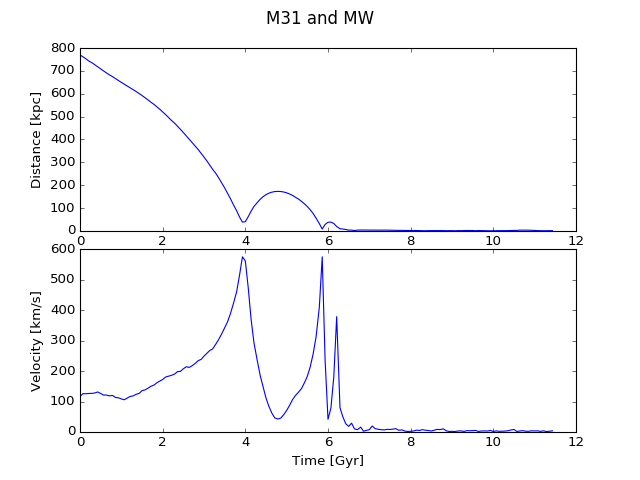

In [10]:
# Plot for M31 and MW relative distance and velocity

# Set up plot
fig = plt.figure(0)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('M31 and MW', fontsize=15)

# Distance plot 
ax1 = plt.subplot(211)
plt.plot(time, M31MW_pos)
plt.xlabel('Time [Gyr]')
plt.ylabel('Distance [kpc]')

# Velocity plot
ax2 = plt.subplot(212)
plt.plot(time, M31MW_vel)
plt.xlabel('Time [Gyr]')
plt.ylabel('Velocity [km/s]')

plt.savefig('M31MW_fig.png')

<IPython.core.display.Javascript object>


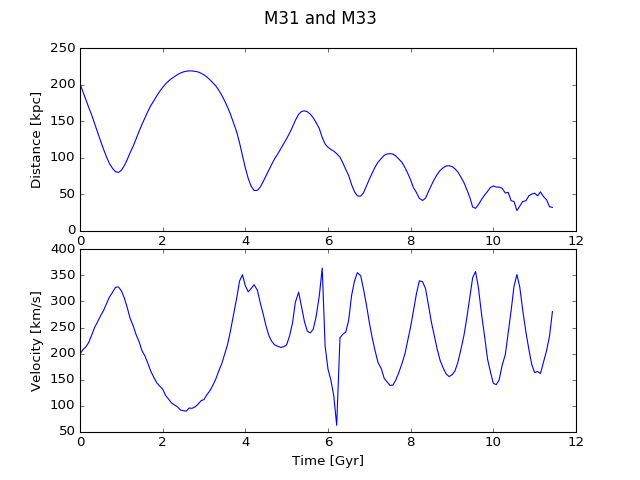

In [11]:
# Plot for M31 and M33 relative distance and velocity

# Set up plot
fig = plt.figure(1)
plt.subplots_adjust(hspace=0.1)
plt.suptitle('M31 and M33', fontsize = 15)

# Distance plot
plt.subplot(211)
plt.plot(time, M31M33_pos)
plt.ylabel('Distance [kpc]')

# Velocity plot
plt.subplot(212)
plt.plot(time, M31M33_vel)
plt.xlabel('Time [Gyr]')
plt.ylabel('Velocity [km/s]')

plt.savefig('M31M33_fig.png')

<IPython.core.display.Javascript object>


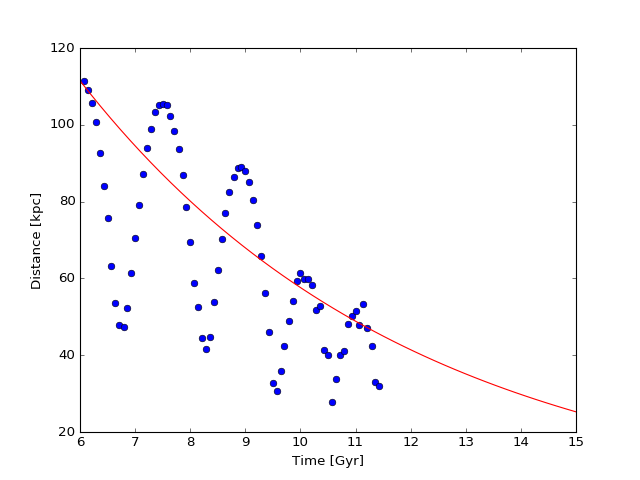

In [8]:
# Esitmation of M33 orbit decay after 6.0 Gyr

# Grab only the data after 6.0 Gyr
index = np.where(time > 6.0)
x = time[index]
y = M31M33_pos[index]

# define the exponential function to test fit
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

# Plot the fit to the data
fig = plt.figure(2)
t = np.linspace(6.0, 15)
plt.plot(x,y,'o')
plt.xlabel('Time [Gyr]')
plt.ylabel('Distance [kpc]')
f = model_func(t, 300, 0.165, 0)
plt.plot(t, f, 'r-')

In [9]:
# Solve for the time it takes M33 to collide with Milkdromeda
Col_time = np.log(10/75)/(-0.165)
print("The time it takes M33 to collide after starting from 75 kpc is:\n{}".format(Col_time))

The time it takes M33 to collide after starting from 75 kpc is:
12.211533457831907
